In [1]:
import random
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%reload_ext autoreload

In [18]:
metrics = ['ClassLoss', 'BBoxXYLoss', 'BBoxWHLoss', 'ConfidenceLoss', 'ClassAccuracy', 'AverageIOU']
# metrics = ['ClassLoss', 'BBoxXYLoss', 'BBoxWHLoss', 'ConfidenceLoss']
loss_metrics = ['ClassLoss', 'BBoxXYLoss', 'BBoxWHLoss', 'ConfidenceLoss']
def parse_log(file_name, train):
    if train:
        # train metric
        flag = 7
    else:
        # validation metric
        flag = 4
        
    train_metric = {}
    for metric in metrics:
        train_metric[metric] = []

    with open(file_name) as fin:            
        for line in fin.readlines():
            line = [i.strip() for i in line.strip().split(' ')]
            acc = line[-1].strip().split('=')
            if len(line) == flag:
                for metric in metrics:
                    if metric in acc[0]:
                        train_metric[metric].append(float(acc[-1]))
    return train_metric

# batch_size=64

lr = 1e-2, ClassLoss = 1.604945
lr = 1e-2, BBoxXYLoss = 0.465807
lr = 1e-2, BBoxWHLoss = 0.479095
lr = 1e-2, ConfidenceLoss = 0.041809
lr = 1e-2, ClassAccuracy = 0.048177
lr = 1e-2, AverageIOU = 0.302639


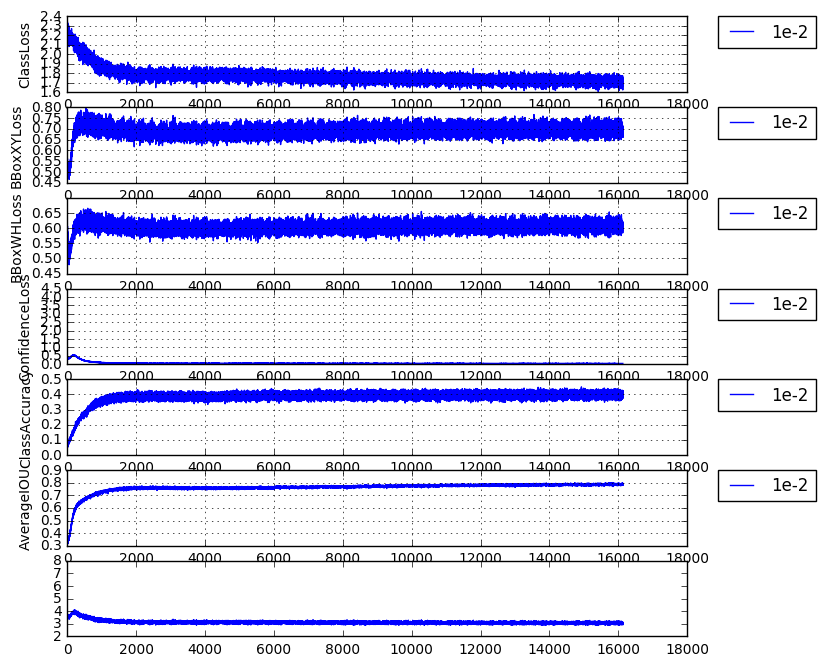

In [29]:
lr_list = ['1e-2']
FILE_NAME_FORMAT = "./log/{0}"
'ClassLoss', 'BBoxXYLoss', 'BBoxWHLoss', 'ConfidenceLoss'
for lr in lr_list:
    file_name = FILE_NAME_FORMAT.format(lr)
    train_acc = parse_log(file_name, True)
    total_loss = [train_acc['ClassLoss'][i]+train_acc['BBoxXYLoss'][i]+train_acc['BBoxWHLoss'][i]+train_acc['ConfidenceLoss'][i] for i in range(len(train_acc['ClassLoss']))]
    
    for idx, metric in enumerate(metrics):    
        plt.subplot(len(metrics)+1, 1, idx+1)
        plt.plot(train_acc[metric], label=lr)
        print 'lr = %s, %s = %s' % (lr, metric, min(train_acc[metric]))
    plt.subplot(len(metrics)+1, 1, len(metrics)+1)
    plt.plot(total_loss, label="total loss")

for idx, metric in enumerate(metrics):    
    plt.subplot(len(metrics)+1, 1, idx+1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel(metric)
    plt.grid('on')

plt.show()

lr = 1e-2, ClassLoss = 1.921264
lr = 1e-2, BBoxXYLoss = 0.403084
lr = 1e-2, BBoxWHLoss = 0.438138
lr = 1e-2, ConfidenceLoss = 0.321293
lr = 1e-2, ClassAccuracy = 0.082417
lr = 1e-2, AverageIOU = 0.353105


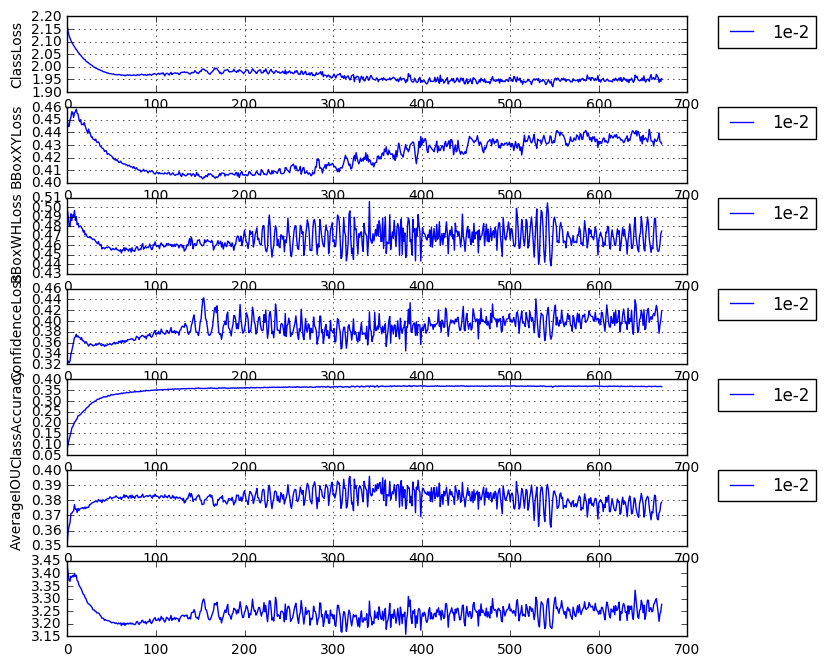

In [30]:
for lr in lr_list:
    file_name = FILE_NAME_FORMAT.format(lr)
    train_acc = parse_log(file_name, False)
    total_loss = [train_acc['ClassLoss'][i]+train_acc['BBoxXYLoss'][i]+train_acc['BBoxWHLoss'][i]+train_acc['ConfidenceLoss'][i] for i in range(len(train_acc['ClassLoss']))]
    for idx, metric in enumerate(metrics):    
        plt.subplot(len(metrics)+1, 1, idx+1)
        plt.plot(train_acc[metric], label=lr)
        print 'lr = %s, %s = %s' % (lr, metric, min(train_acc[metric]))
    plt.subplot(len(metrics)+1, 1, len(metrics)+1)
    plt.plot(total_loss)
for idx, metric in enumerate(metrics):    
    plt.subplot(len(metrics)+1, 1, idx+1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel(metric)
    plt.grid('on')

plt.show()